## Filtering of Sceletium alkaloids

In [1]:
import pandas as pd
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Lipinski import HeavyAtomCount
from rdkit.Chem.Scaffolds import MurckoScaffold

from tqdm import tqdm

In [2]:
import os
import sys

BASE_PATH = os.path.dirname(os.getcwd())
sys.path.append(BASE_PATH)

from src.utils import count_nitrogen_atoms

In [3]:
HERE = Path.cwd().parent

chembl = pd.read_csv(HERE / "data" / "processed" / "chembl_35_NP_cleaned.csv")
chembl.head(2)

,chembl_id,taut_smiles
0,CHEMBL1000,O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1
1,CHEMBL100014,CCCC(=O)OCOC(=O)C(C)(C)C


In [4]:
representatives = {
    "Mesembrine": "CN1CC[C@]2([C@@H]1CC(=O)CC2)C3=CC(=C(C=C3)OC)OC",
    "Mesembranol": "CN1CCC2(C1CC(CC2)O)C3=CC(=C(C=C3)OC)OC",
    "Mesembrenol": "CN1CCC2(C1CC(C=C2)O)C3=CC(=C(C=C3)OC)OC",
}

In [59]:
scaffolds_smiles = set()
for smi in representatives.values():
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        continue
    Chem.RemoveStereochemistry(mol)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    # if HeavyAtomCount(scaffold) < 16:
    #     continue
    scaffold_smi = Chem.MolToSmiles(scaffold)
    if scaffold_smi not in scaffolds_smiles:
        scaffolds_smiles.add(scaffold_smi)

In [60]:
scaffolds_smiles

{'C1=CC2(c3ccccc3)CCNC2CC1',
 'O=C1CCC2(c3ccccc3)CCNC2C1',
 'c1ccc(C23CCCCC2NCC3)cc1'}

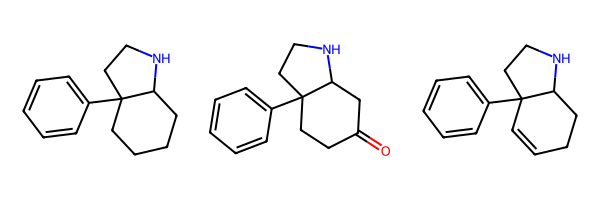

In [61]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in scaffolds_smiles])

In [62]:
def contain_min_scaffold(mol):
    if any(mol.HasSubstructMatch(Chem.MolFromSmiles(query)) for query in scaffolds_smiles):
        return True
    return False

In [63]:
m = Chem.MolFromSmiles("CN1CCC2(C1CC(CC2)O)C3=CC(=C(C=C3)OC)OC")
contain_min_scaffold(m)

True

In [64]:
def comply_restrictions(mol):
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    # n_heavy_atoms = HeavyAtomCount(scaffold)
    sssr = Chem.GetSSSR(scaffold)
    # if n_heavy_atoms < 16 or n_heavy_atoms > 28:
    #     return False
    if count_nitrogen_atoms(scaffold) > 2:
        return False
    if len(sssr) > 4:
        return False
    return True


In [65]:
Ph_octahydroindoles_in_chembl = []
sceletium_alk_in_chembl = []
for i, row in tqdm(chembl.iterrows(), total=len(chembl)):
    mol = Chem.MolFromSmiles(row["taut_smiles"])
    if contain_min_scaffold(mol):
        Ph_octahydroindoles_in_chembl.append(i)
        if comply_restrictions(mol):
            sceletium_alk_in_chembl.append(i)

print(len(Ph_octahydroindoles_in_chembl), len(sceletium_alk_in_chembl))

100%|██████████| 78163/78163 [01:16<00:00, 1021.68it/s]

427 7


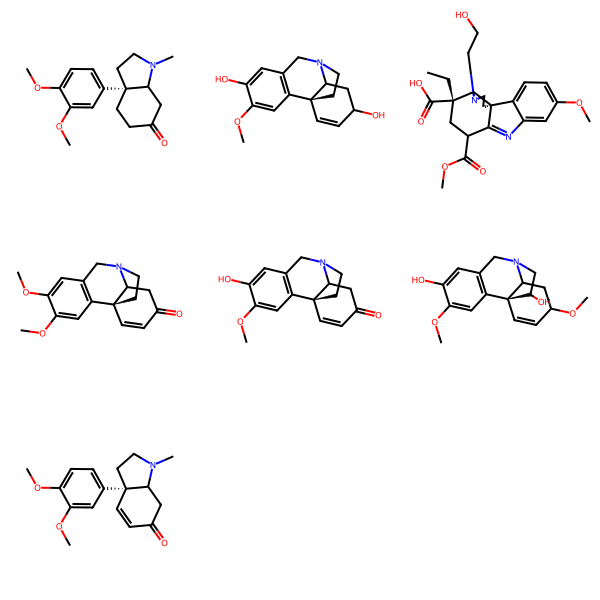

In [66]:
mols = [Chem.MolFromSmiles(s) for s in chembl.loc[sceletium_alk_in_chembl, "taut_smiles"]]
Draw.MolsToGridImage(mols)

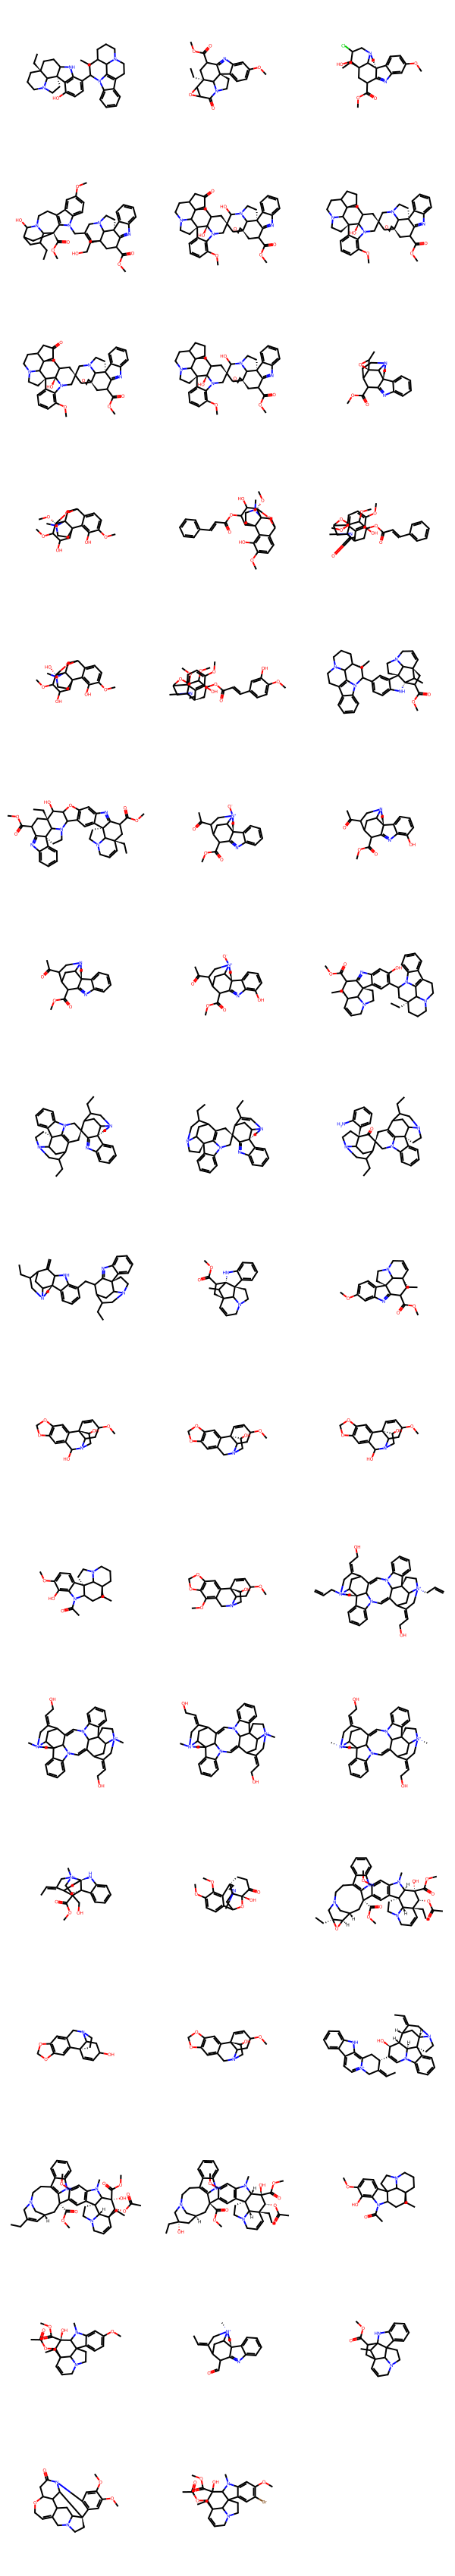

In [23]:
mols = [Chem.MolFromSmiles(s) for s in chembl.loc[Ph_octahydroindoles_in_chembl, "taut_smiles"]]
Draw.MolsToGridImage(mols[:50])

## Filtering of Amaryllidaceae alkaloids

In [5]:
representatives_am_real = {
    "Lycorine": "C1CN2CC3=CC4=C(C=C3[C@H]5[C@H]2C1=C[C@@H]([C@H]5O)O)OCO4",
    "Galanthamine": "CN1CC[C@@]23C=C[C@@H](C[C@@H]2OC4=C(C=CC(=C34)C1)OC)O",
    "Tazettine": "CN1C[C@@]2([C@]3([C@@H]1C[C@@H](C=C3)OC)C4=CC5=C(C=C4CO2)OCO5)O",
    "Narciclasine": "C1OC2=C(O1)C(=C3C(=C2)C4=C[C@@H]([C@H]([C@H]([C@@H]4NC3=O)O)O)O)O",
    "Montanine": "CO[C@H]1C=C2[C@H](C[C@@H]1O)N3C[C@H]2C4=CC5=C(C=C4C3)OCO5",
    "Lycorenine": "CN1CCC2=CC[C@@H]3[C@H]([C@@H]21)C4=CC(=C(C=C4[C@H](O3)O)OC)OC",
    "Haemanthamine": "CO[C@H]1C[C@H]2[C@@]3(C=C1)[C@H](CN2CC4=CC5=C(C=C34)OCO5)O",
    "Crinine": "C1CN2CC3=CC4=C(C=C3[C@]15[C@H]2C[C@H](C=C5)O)OCO4",
}

In [6]:
representatives_am = {
    "Lycorine_ed": "C1CN2CC3=CC=C(C=C3[C@H]4[C@H]2C1=C[C@@H]([C@H]4O)O)",
    "Galanthamine": "CN1CC[C@@]23C=C[C@@H](C[C@@H]2OC4=C(C=CC(=C34)C1)OC)O",
    "Tazettine_ed": "CN1C[C@@]2([C@]3([C@@H]1C[C@@H](C=C3)OC)C4=CC=C(C=C4CO2))O",
    "Narciclasine_ed": "C2=CC(=C3C(=C2)C4=C[C@@H]([C@H]([C@H]([C@@H]4NC3=O)O)O)O)O",
    "Montanine_ed": "CO[C@H]1C=C2[C@H](C[C@@H]1O)N3C[C@H]2C4=CC=C(C=C4C3)",
    "Lycorenine": "CN1CCC2=CC[C@@H]3[C@H]([C@@H]21)C4=CC(=C(C=C4[C@H](O3)O)OC)OC",
    "Haemanthamine_ed": "CO[C@H]1C[C@H]2[C@@]3(C=C1)[C@H](CN2CC4=CC=C(C=C34))O",
    "Crinine_ed": "C1CN2CC3=CC=C(C=C3[C@]15[C@H]2C[C@H](C=C5)O)",
}

In [7]:
scaffolds_smiles = set()
for smi in representatives_am.values():
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        continue
    Chem.RemoveStereochemistry(mol)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    # if HeavyAtomCount(scaffold) < 16:
    #     continue
    scaffold_smi = Chem.MolToSmiles(scaffold)
    if scaffold_smi not in scaffolds_smiles:
        scaffolds_smiles.add(scaffold_smi)

In [8]:
scaffolds_smiles

{'C1=C2C3CN(Cc4ccccc43)C2CCC1',
 'C1=C2CCN3Cc4ccccc4C(CC1)C23',
 'C1=C2CCNC2C2c3ccccc3COC2C1',
 'C1=CC23CCN(Cc4ccccc42)C3CC1',
 'C1=CC23CCNCc4cccc(c42)OC3CC1',
 'C1=CC23c4ccccc4COC2CNC3CC1',
 'O=C1NC2CCCC=C2c2ccccc21'}

In [13]:
def contain_min_scaffold(mol):
    if any(mol.HasSubstructMatch(Chem.MolFromSmiles(query)) for query in scaffolds_smiles):
        return True
    return False

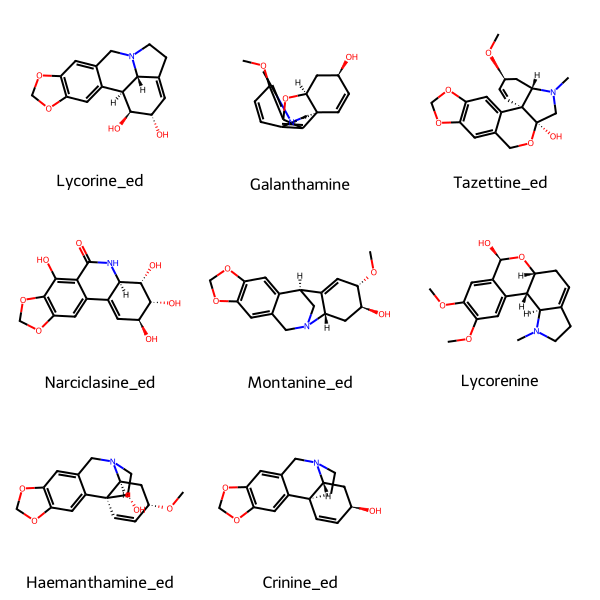

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in representatives_am_real.values()],
                     legends=list(representatives_am.keys()))

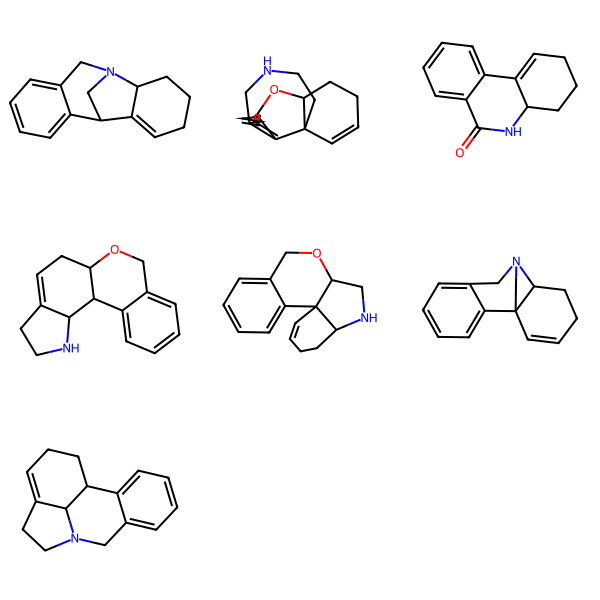

In [15]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in scaffolds_smiles])

In [16]:
def comply_restrictions2(mol):
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    # n_heavy_atoms = HeavyAtomCount(scaffold)
    # sssr = Chem.GetSSSR(scaffold)
    # if n_heavy_atoms < 16 or n_heavy_atoms > 28:
    #     return False
    if count_nitrogen_atoms(scaffold) > 1:
        return False
    # if len(sssr) > 3:
    #     return False
    return True


In [17]:
filtered_chembl = []
am_alk_in_chembl = []
for i, row in tqdm(chembl.iterrows(), total=len(chembl)):
    mol = Chem.MolFromSmiles(row["taut_smiles"])
    if contain_min_scaffold(mol):
        filtered_chembl.append(i)
        if comply_restrictions2(mol):
            am_alk_in_chembl.append(i)

print(len(filtered_chembl), len(am_alk_in_chembl))

100%|██████████| 78163/78163 [01:31<00:00, 854.49it/s]

107 107


In [19]:
chembl.iloc[am_alk_in_chembl]["chembl_id"].to_csv(HERE / "data" / "Amaryllidaceae.csv",
                                                  index=False)

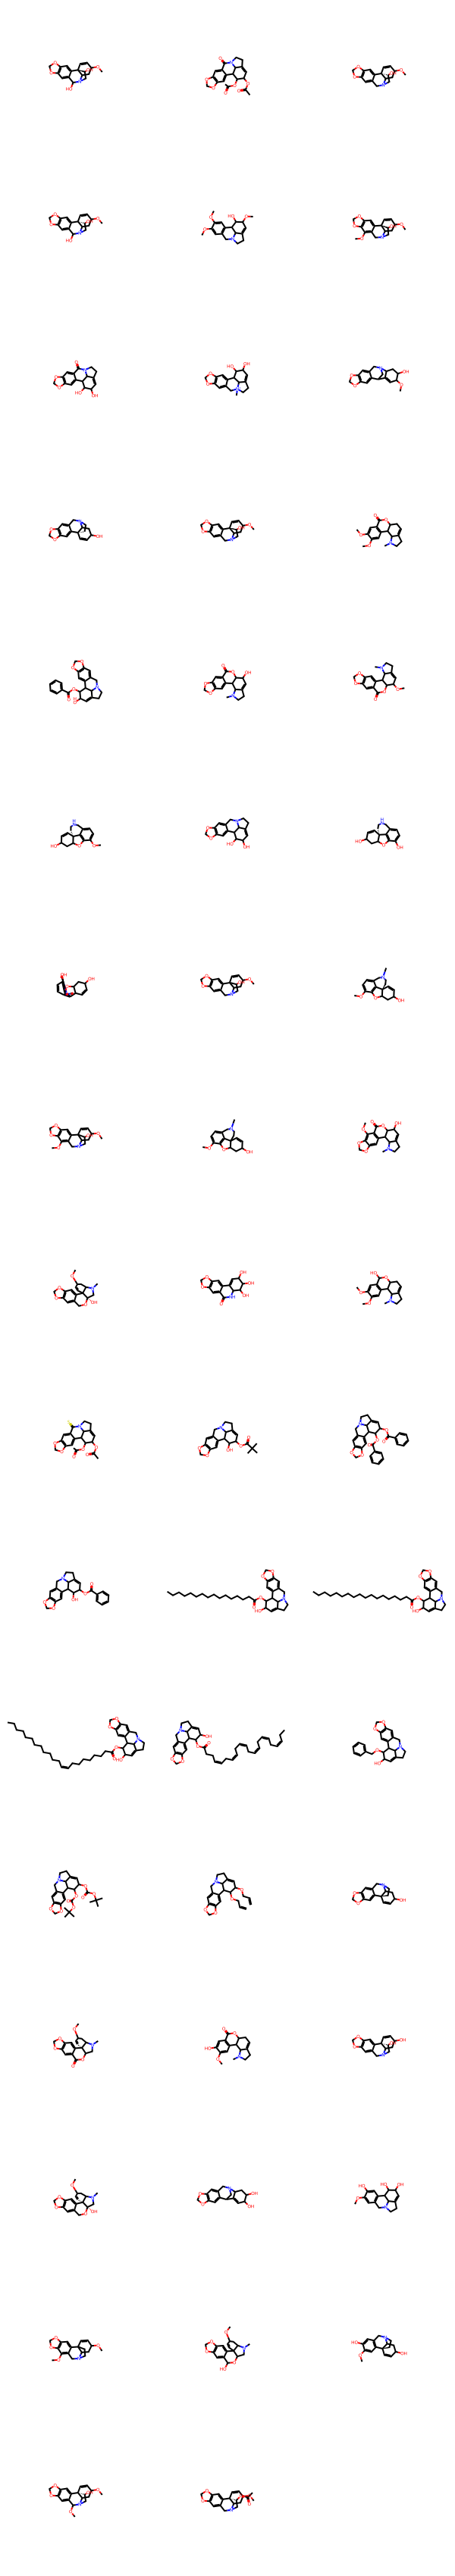

In [18]:
mols = [Chem.MolFromSmiles(s) for s in chembl.loc[am_alk_in_chembl, "taut_smiles"]]
Draw.MolsToGridImage(mols[:50])